### <p style="text-align: right;"> &#9989; Jacob Jensen

#### <p style="text-align: right;"> &#9989; Luke Layman, John Romig, Dave Yonkers, Kyleigh Phillips

# Day 19 In-class Assignment: The Traveling Salesperson Problem - An Application of Monte Carlo

<img src="http://2.bp.blogspot.com/-FRB8y7vdWqk/VQLeb7zYOHI/AAAAAAAAqD8/bz5XL4uo_NQ/s523/mapsmania.jpg" width=500px>

## Goals for today's in-class assignment:

* Use Monte Carlo methods to find the shortest path between several cities - the Traveling Salesperson problem.
* Explore how randomization can be used to optimize problems that would be incredibly computationally expensive (and sometimes impossible) to solve exactly.

## Assignment instructions

Work with your group to complete this assignment. Instructions for submitting this assignment are at the end of the notebook. The assignment is due at the end of class.

---
## The Traveling Salesman Problem

The [Traveling Salesperson Problem](https://simple.wikipedia.org/wiki/Travelling_salesman_problem) is a classic problem in computer science in the area of **optimization**.  The problem is as follows: Imagine there is a salesperson who has to travel to N cities.  The order is unimportant, as long as they only visit each city once on each trip, and finish where they started.  The salesperson wants to keep the distance traveled (and thus travel costs) as low as possible.  This problem is interesting for a variety of reasons - it applies to transportation (finding the most efficient bus routes), logistics (finding the best UPS or FedEx delivery routes for some number of packages), or in optimizing manufacturing processes to reduce cost.

The Traveling Salesperson Problem is extremely difficult to solve for large numbers of cities - testing every possible combination of cities would take N! (N factorial) individual tests.  For 10 cities, this would require 3,628,800 separate tests.  For $20$ cities, this would require $2,432,902,008,176,640,000$ (approximately $2.4 \times 10^{18}$) tests - if you could test one combination per microsecond ($10^{-6}$ s) it would take approximately 76,000 years!  For 30 cities, at the same rate testing every combination would take more than one billion times the age of the Universe.  As a result, this is the kind of problem where a "good enough" answer is sufficient, and where randomization comes in.

A good local example of a solution to the Traveling Salesperson Problem is [an optimized Michigan road trip](http://www.randalolson.com/2015/03/18/pure-michigan-road-trip-optimized/) calculated by a former MSU graduate student (and [one across the US](http://nbviewer.jupyter.org/github/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/optimal-road-trip/Computing%20the%20optimal%20road%20trip%20across%20the%20U.S..ipynb)).  There's also a widely-used [software library for solving the Traveling Salesperson Problem](http://www.math.uwaterloo.ca/tsp/index.html); the website has some interesting applications of the problem!

This project has many steps. Read through all of the steps in advance and discuss them with your group. You might want to divide and conquer by forming sub-teams within your group. Or, simply put as many brains on each task as you can to get through each step quickly and accurately. **Use the whiteboards and the monitors to facilitate communication with your group members.**

## The Monte Carlo (MC) Algorithm We Will Use

There are many ways to use MC to solve the Traveling Salesperson Problem. Here we will use this basic idea:
* store an array that has a list of cities in the order that they are visited; these can be chosen randomly because we are going to search for many other orders
* once we have that list, we will find the distance (you got a little practice with this in the pre-class assignment)
* you will then choose randomly (this is why this is a MC method!) two cities in that list and switch them in the array, which changes the order the salesman will take, but make sure to store the old list! (you will see why)
* now, with that new list, you find the new distance; if the new distance is less than the previous, this becomes the new order for the salesperson; if not, go back to the previous order (which is why you saved it!)
* loop through this many times, and plot the path each time through
* at each MC step, append to an array the current distance and plot this at the end so that you can see how the MC algorithm made progress

The algorithm of choosing two cities in the list and swapping them is _only one_ way to do this. Below you will be asked to think of several other possibilites and try at least one of them. As you code this and think about what it is doing, you might think of better algorithms along the way.

As you get shorter and shorter distances, post your best results with your random number seed on Slack. Let's see which group has the best algorithm? (And, let's see if we all agree with each other.)

In [1]:
# EXECUTE THIS CELL (this gets our important imports out of the way)
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

____
#### A Word to the Wise....
____

This project has a lot of interconnected parts, which will lead to code that might get pretty complicated. Take time with your group to outline a step-by-step process for building each of the parts step by step. 

We have left little code ideas below. Feel free to use them, or ignore them if you have a better way or they just confuse you. This is a good time to use functions, which break up a larger problem into smaller, more manageable pieces. 
____

Here are two functions that you might find useful. Feel free to use them, modify them, or if you're feeling ambitious and want to write your own functions, you can even ignore them.

In [29]:
def calc_total_distance(table_of_distances, city_order):
    '''
    Calculates distances between a sequence of cities.
    
    Inputs: N x N array containing distances between each pair of the N
    cities, as well as an array of length N+1 containing the city order,
    which starts and ends with the same city (ensuring that the path is
    closed)

    Returns: total path length for the closed loop.
    '''
    total_distance = 0.0

    # loop over cities and sum up the path length between successive pairs
    for i in range(city_order.size-1):
        total_distance += table_of_distances[city_order[i]][city_order[i+1]]

    return total_distance


def plot_cities(city_order, city_x, city_y):
    '''
    Plots cities and the path between them.
    
    Inputs:
    
    city_order : the order of cities
    city_x : the x courdinates of each city
    city_y : the y coordinates of each city.  
    
    Returns: a plot showing the cities and the path between them.
    '''
    
    # first make x,y arrays
    x = []
    y = []

    # put together arrays of x and y positions that show the order that the
    # salesman traverses the cities
    for i in range(0, city_order.size):
        x.append(city_x[city_order[i]])
        y.append(city_y[city_order[i]])

    # append the first city onto the end so the loop is closed
    x.append(city_x[city_order[0]])
    y.append(city_y[city_order[0]])

    time.sleep(0.1)  
    clear_output(wait = True)
    display(fig)            # Reset display
    fig.clear()             # clear output for animation

    plt.xlim(-0.4, 20.4)    # give a little space around the edges of the plot
    plt.ylim(-0.4, 20.4)
    
    # plot city positions in blue, and path in red.
    plt.plot(city_x, city_y, 'bo', x, y, 'r-')
    
def calculate_distances(xAr, yAr):
    
    distanceAr = np.empty((len(xAr), len(xAr)))
    
    for row in range(len(distanceAr)):
        xOriginCity = xAr[row]
        yOriginCity = yAr[row]
        for column in range(len(distanceAr)):
            xTravelCity = xAr[column]
            yTravelCity = yAr[column]
            
            dist = (( (xOriginCity - xTravelCity) ** 2) + ((yOriginCity - yTravelCity)**2) )**0.5
            distanceAr[row,column] = dist
    return distanceAr

## Setting everything up

The following code does much of the setup work for you, so that you can focus on finding the "best" route for your salesperson.  The code does the following:

* Given a number of cities, sets up random x and y positions
* Calculates a table of distances between pairs of cities, which can be used for calculating the total trip distance. (this is what you tried to do in the pre-class assignment)
* Sets up an array that controls the order that the salesperson travels between cities
* Plots out the initial path.

This code sets things up to get the MC process started. You might have a better way to do this, so feel free to make changes...or not. Either way, walk through and discuss this with your group members.

**Make sure you understand what all of this code is doing!**

<Figure size 432x432 with 0 Axes>

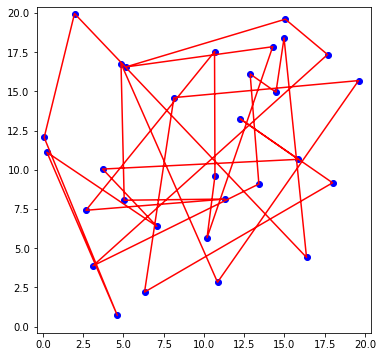

In [30]:
# number of cities we'll use.
number_of_cities = 30

# seed for random number generator so we get the same value every time!
# There is a really nice feature of using seeds here: your classmates can also use the same
# seed. As you get results post them on Slack with your seed. Let's see who gets the shortest
# distance! (Or, the same distance when that is appropriate.)
np.random.seed(123456789)

# create random x,y positions for our current number of cities.  (Distance scaling is arbitrary.)
city_x = np.random.random(size = number_of_cities) * 20.0
city_y = np.random.random(size = number_of_cities) * 20.0

# table of city distances - empty for the moment
city_distances = np.zeros((number_of_cities,number_of_cities))

# Calculate distance between each pair of cities and store it in the table.
# Technically we're calculating 2x as many things as we need (as well as the
# diagonal, which should all be zeros).
for a in range(number_of_cities):
    for b in range(number_of_cities):
        city_distances[a][b] = ((city_x[a] - city_x[b])**2 + (city_y[a]-city_y[b])**2 )**0.5

# create the array of cities in the order we're going to go through them
city_order = np.arange(city_distances.shape[0])

# tack on the first city to the end of the array, since that ensures a closed loop
city_order = np.append(city_order, city_order[0])

fig = plt.figure(figsize=(6,6))
plot_cities(city_order, city_x, city_y)

## Put your code below this!

Now it is your turn!

As a reminder of the plan from above, our code should take some number of steps, doing the following at each step:

1. Randomly swap two cities in the array of cities (except for the first/last city)
2. Check the total distance traversed by the salesman
3. If the new ordering results in a shorter path, keep it.  If not, throw it away.
4. Plot the shorter of the two paths (the original one or the new one)

Also, you keep track of the steps and the minimum distance traveled as a function of number of steps so that you can plot out the minimum distance as a function of step later on!

**Task**: Two skeleton functions, `swap_city` and `find_path`, have been included below that you should try to use for solving this problem. The `find_path` function should call the `swap_city` function to change the path and the `plot_cities` function to display the current path as you hunt for a better path. If you can get both functions working, you can just execute the cells for visualizing the results near the end of the assignment

In [135]:
# Put your code here!

# Some ideas are given below:

def swap_city(city_order):
    '''
    This function randomly swaps two cities in the current path defined by city_order.
    Args:
       city_order: a path for the salesperson.
    Returns:
       new_order: new path with two cities swapped.
    '''
    # This step is important! What is ".copy()" doing? What if we didn't include that?
    new_order = city_order.copy()
    
    # Put your swapping code here
    num_cities = len(city_order)
    
    i1 = np.random.randint(1, num_cities - 2)
    
    while True:
        i2 = np.random.randint(1, num_cities - 2)
        if i1 != i2:
            break
    
    c1 = city_order[i1]
    c2 = city_order[i2]
    
    new_order[i2] = c1
    new_order[i1] = c2
    
    return new_order

def shuffle_city(city_order):
    # This step is important! What is ".copy()" doing? What if we didn't include that?
    new_order = city_order.copy()
    ends = new_order[0]
    
    new_order_core = new_order[1: len(new_order) - 2].copy()
    np.random.shuffle(new_order_core)
    
    new_order_core = np.insert(new_order_core, 0, ends)
    new_order = np.append(new_order_core, ends)
    
    return new_order

def find_path(city_order, dist_table, city_x, city_y, N):
    '''
    This function finds the shortest path covering all cities using MC method. 
    Args:
       city_order: a path for the salesperson.
       dist_table: array containing mutual distance between cities.
       city_x: the x coordinate of the cities.
       city_y: the y coordinate of the cities.
       N: the number of iterations for the search.
    Returns:
       best_order: a solution for "best" path.
       dist: list of distances for each iteration
    '''
    # Put your path-finding code here, make sure you plot the cities so that you can see the path change
    
    best_order = city_order.copy()
    
    dist = []
    
    for i in range(N):
        
        bestDist = calc_total_distance(dist_table, best_order)
        
        new_order = swap_city(best_order)
        
        newDist = calc_total_distance(dist_table, new_order)
        
        if newDist < bestDist:
            
            best_order = new_order.copy()
            
            dist.append(newDist)
        else:
            dist.append(bestDist)
        
    plot_cities(best_order, city_x, city_y)

    return dist, best_order

#### Testing your code

Test out your `swap_city` code here. Make sure that the code doesn't inadvertently change your original city order! It should return a new order array. This is important for making sure your `find_path` code works correctly.

In [136]:
# Test your swap_city code here
newOrder = shuffle_city(city_order)
print(newOrder)

[ 0 24 16 21 25 15 12  3 27  7 17 11  9  6  1  8  2 26  5 13 18 10 28  4
 20 23 19 14 22  0]


___
### Visualizing your results

This is where you will output your results. The main two outputs are an animation with the increasingly shorter path, and a plot of the distances versus trial number. Also, make a point to keep track of the shortest distance for a given seed and number of trials so that you can compare with people on Slack to see if your code is working. If you use the same seed, your results should be the same as other groups.

This cell should produce the animation of ever-shortening paths, if your code is set up correctly. It should also return a list of distances and the "best" order. You can use the list of distances for the plot in the next cell.

<Figure size 432x432 with 0 Axes>

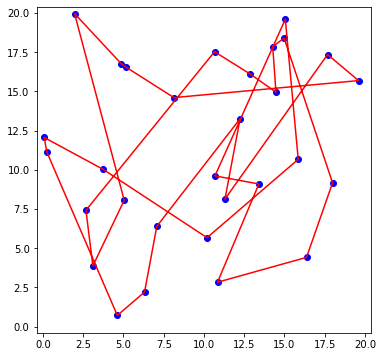

In [137]:
fig = plt.figure(figsize=(6,6))
np.random.seed(8675309) # Feel free to change this to see how the results change!
dist, best_order = find_path(city_order, city_distances, city_x, city_y, N = 100)

This cell should plot the distance as a function of the number of iterations. You should find that the total distance of the route gets shorter with time.

Final distance: 177.29919938470746


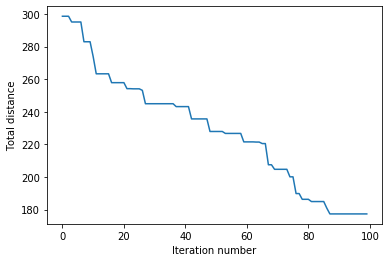

In [138]:
plt.plot(dist)
plt.xlabel("Iteration number")
plt.ylabel("Total distance")
print("Final distance:",dist[-1])

___
### Brainstorming and testing other algorithms

It is possible that the algorithm used here is not the best. Discuss with your group other possible algorithms and write three ideas here. If you have time, try coding one of them. 

Our group's new ideas for algorithms:

1. Swap a certain amount of indexes
2. Use shuffle from np.random
3. 

Our code:

----


-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your names in the first cell).


&#169; Copyright 2018,  Michigan State University Board of Trustees